# 👩🏼‍🤝‍🚻 MBTI Personality Test

## Group: AMADOU Khadidja, Duan Sining, Zhang Yajie

## Objective of the project
 
In this project,
We use machine learning methods to classify different personality types, study the correlations between them and test their accuracy. 


Trying to determine a person's personality type based on some of the texts they have written

 
## *Data description*
This data was collected through the PersonalityCafe forum https://www.kaggle.com/datasnaek/mbti-type 

It divides each person into 16 different personality types on 4 axes. Each axes include 2 letters, representing a personality. and we will combine these groups of letters.

1.`E`and`I`: E=Outward and I=Inward

2.`S`and`N`: S=Feeling and N=Intuition

3.`T`and`F`: T=Thinking and F=emotion

4.`J`and`P`: J=Judging and P=Competition

the combination of the 4 gives us 16 personalities defined below:
 
 1.`ISTJ`-are reliable, trustworthy, attentive to details
 
 2.`ISFJ`-are considerate and friendly
 
 3.`INFJ`-are calm, supportive and compassionate
 
 4.`INTJ`-are strategic and have a global vision of things 
 
 5.`ISTP`-are calm, focused, productive and open to new opportunities
 
 6.`ISFP`-are friendly, kind and considerate
 
 7.`INFP`-are empathetic and understanding of others
 
 8.`INTP`-are logical, analytical and adaptable
 
 9.`ESTP`-are energetic, enthusiastic, adaptable and playful
 
 10.`ESFP`-are fun, sociable, easy-going 
 
 11.`ENFP`-are inspiring, motivating and energetic
 
 12.`ENTP`-are visionary, flexible, energetic and enthusiastic
 
 13.`ESTJ`-are analytical, decisive and organized
 
 14.`ESFJ`-are strong-minded, conscientious, enterprising
 
 15.`ENFJ`-are attractive, empathetic, motivating and inspiring
 
 16.`ENTJ`-natural, determined, decisive and organized leaders

## Libraries used

In [ ]:
#Importing libraries that we will use in our project
#For data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

#For data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

#For some text processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

#Some Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE# Model training and evaluation
from sklearn.model_selection import train_test_split

#For models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore some noise warnings
import warnings
warnings.filterwarnings("ignore")



## Data

In [4]:
#Load the data
data_MBTI = pd.read_csv("/Users/zhangyajie/Documents/Master 2 S3/M2 Machine Learning/Machine Learning Stefano Bianchini/MBTI/mbti_1.csv")
data_MBTI.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [5]:
#Check if there is a null value in all rows
data_MBTI.isnull().any()

type     False
posts    False
dtype: bool

In [6]:
#Size of the data
nRow, nCol = data_MBTI.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8675 rows and 2 columns


In [7]:
#See dtypes of the data
data_MBTI.dtypes

type     object
posts    object
dtype: object

In [10]:
data_MBTI.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


# Notes
> this dataset contains 8675 observations, 16 variables, of type object.

In [11]:
#See the types of personalities in the data
types = np.unique(np.array(data_MBTI['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [32]:
#See the number of each personality
total_personality = data_MBTI.groupby(['type']).count()
total_personality

,posts,number of words
type,,
ENFJ,190,190
ENFP,675,675
ENTJ,231,231
ENTP,685,685
ESFJ,42,42
ESFP,48,48
ESTJ,39,39
ESTP,89,89
INFJ,1470,1470


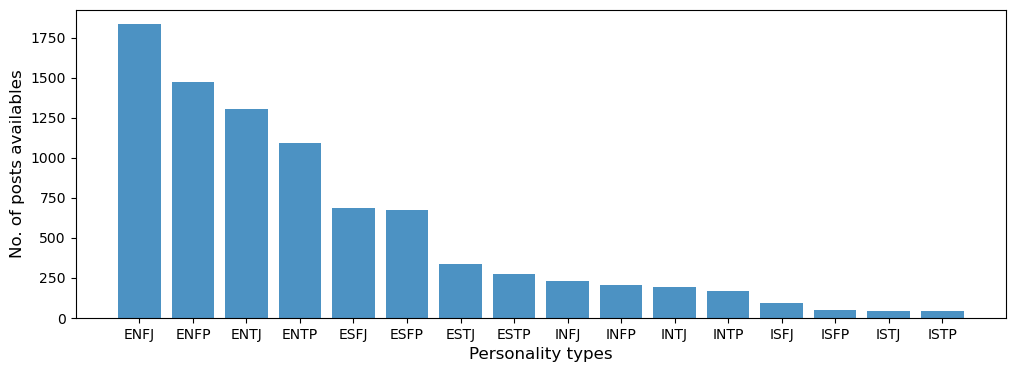

"\n#Plotting this in descending order for better understanding of this visualization\ndata_MBTI_viz = data_MBTI['type'].value_counts()\nplt.figure(figsize=(12,4))\nplt.bar(total_personality.index, data_MBTI_viz.values, alpha=0.8) \nplt.xlabel('Personality types', fontsize=12)\nplt.ylabel('No. of posts availables', fontsize=12)\nplt.show()\n\n"

In [13]:
#Plotting them in descending order
data_MBTI_viz = data_MBTI['type'].value_counts()
plt.figure(figsize=(12,4))
plt.bar(total_personality.index, data_MBTI_viz.values, alpha=0.8) 
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Distribution of Lengths of all Posts')

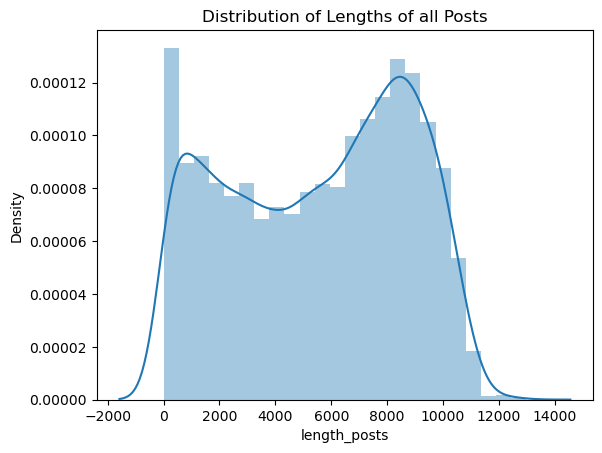

In [33]:
#Distribution of the lengths of all posts, if they are long or short for posts
df = data_MBTI.copy()
df["length_posts"] = df["posts"].apply(len)
sns.distplot(df["length_posts"]).set_title("Distribution of Lengths of all Posts")

In [34]:
#Find the most common words within all the posts we have.
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('eostokendot', 1021005),
 ('that', 105735),
 ('have', 59988),
 ('with', 59299),
 ('this', 53993),
 ('eostokenquest', 51487),
 ('like', 48273),
 ('eostokenexs', 42232),
 ('just', 38682),
 ('dont', 37608),
 ('what', 36480),
 ('about', 35469),
 ('think', 35191),
 ('people', 33181),
 ('when', 32333),
 ('your', 32126),
 ('they', 25799),
 ('know', 25514),
 ('more', 25270),
 ('would', 24885),
 ('really', 24224),
 ('because', 21891),
 ('from', 21728),
 ('some', 19926),
 ('time', 19426),
 ('very', 18293),
 ('there', 18124),
 ('them', 17520),
 ('feel', 16282),
 ('being', 15972),
 ('much', 15933),
 ('well', 15827),
 ('been', 15359),
 ('things', 14513),
 ('other', 14490),
 ('good', 14322),
 ('love', 13824),
 ('something', 13774),
 ('want', 13674),
 ('most', 13610)]

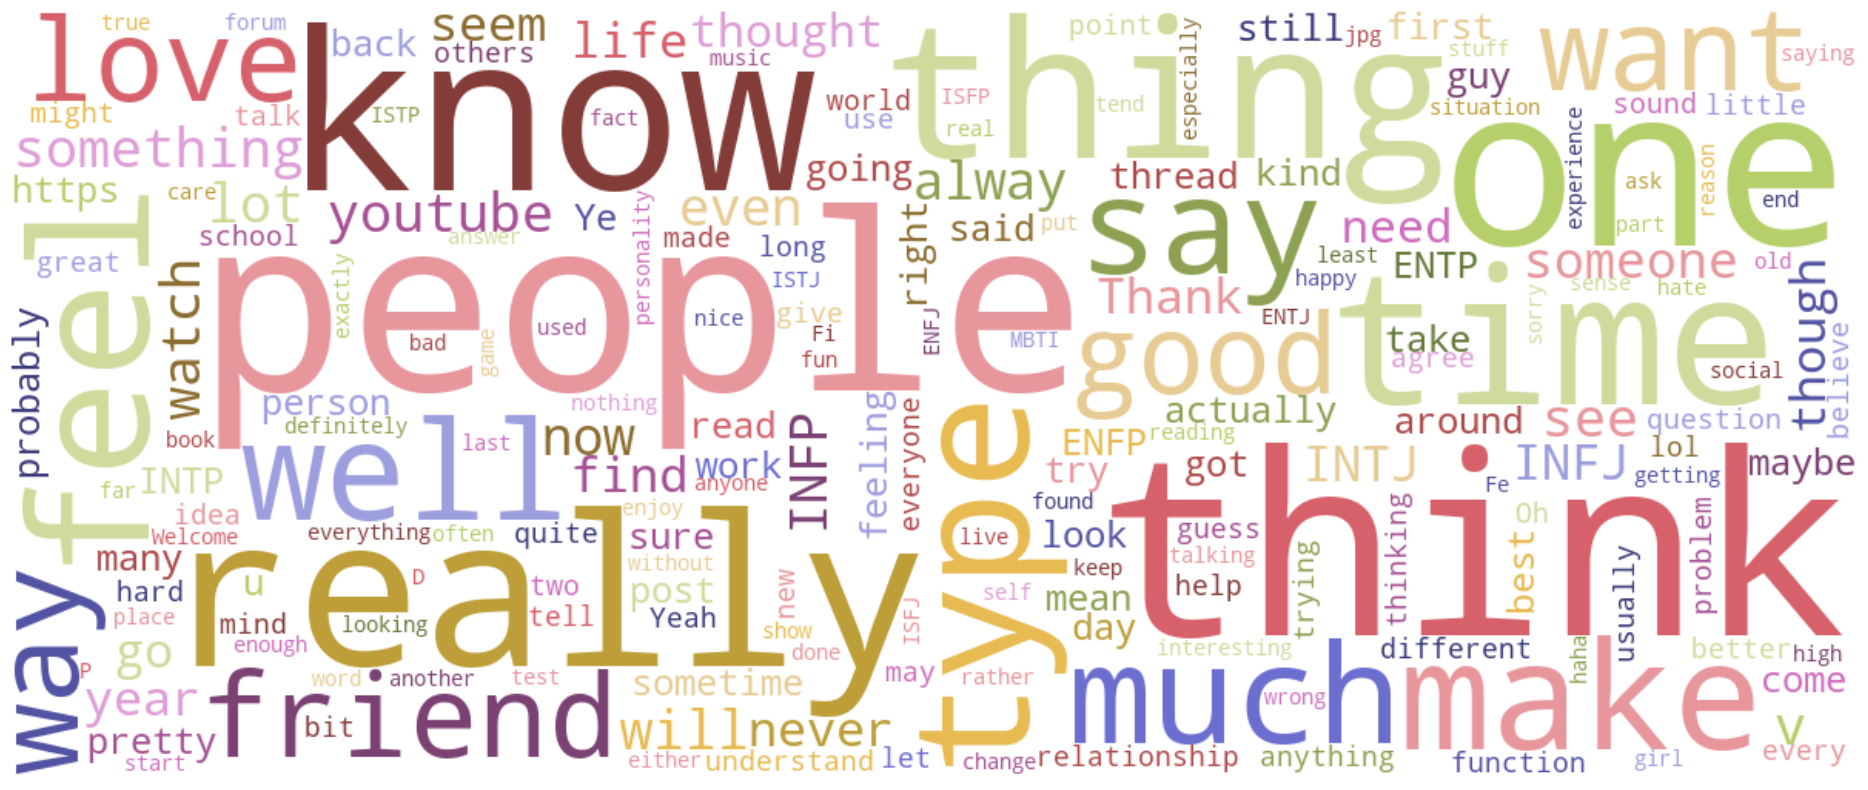

In [18]:
#Plot the most common words with WordCloud.
wc1 = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(words))

# 'Collocations = False' is to set to ensure that in the word cloud, there isn't any duplicate words
plt.figure(figsize=(25,10))
# Generate the word cloud, interpolation 
plt.imshow(wc1, interpolation='bilinear')
_ = plt.axis("off")

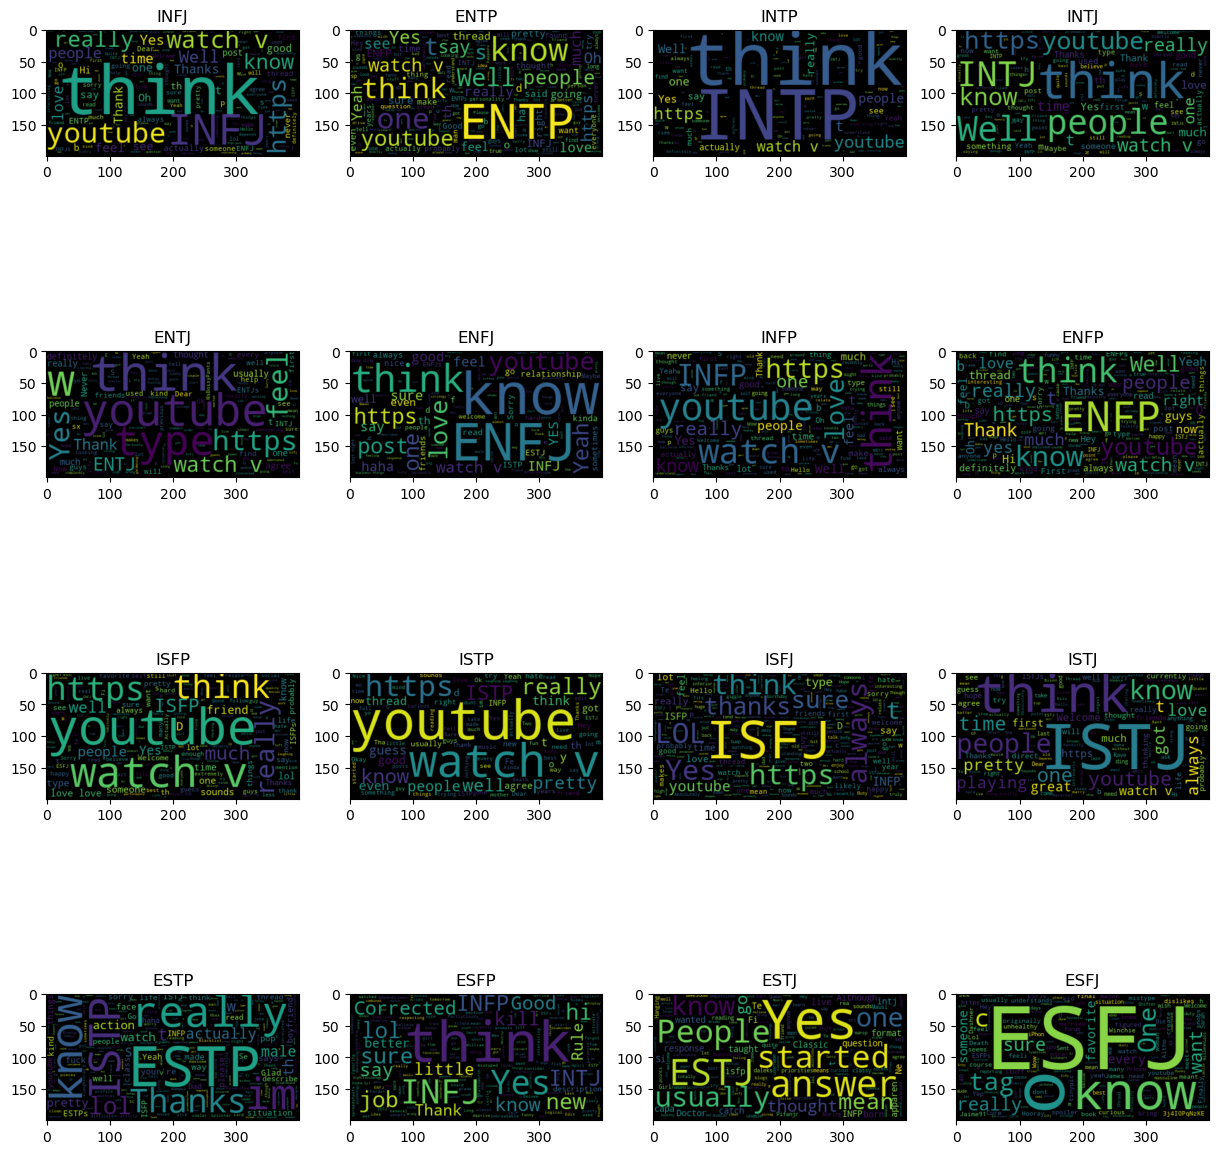

In [19]:
#Plot the most common words for each personality
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

# Intrepretation
> The graphs above show us the popular words used by each personality type.
> For example:
> For ISFJ people, who are considerate and friendly by nature, the most used words are think, thanks, lol and always.


## Data Cleaning

In [20]:
#Separate posts with symbol '|||' and show the 5 first results
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))
print("5 posts from start are:")
posts[0:5]

Number of users 8675
Number of posts 422845
5 posts from start are:


[('INFJ', "'http://www.youtube.com/watch?v=qsXHcwe3krw"),
 ('INFJ', 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg'),
 ('INFJ',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks'),
 ('INFJ', 'What has been the most life-changing experience in your life?'),
 ('INFJ',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.')]

In [21]:
#To make the text in posts cleaner so that we can continue next process
def preprocess_text(df, remove_special=True):
    texts = df['posts'].copy()
    labels = df['type'].copy()

    #Remove links in the text
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Keep the end of sentence characters
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    #Strip punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    #Remove some multiple fullstops
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #Convert posts to lower letters
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #Remove multiple letter repeating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x))
    
    #Remove very short or very long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove MBTI personality words
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")
    
    return df

#Preprocessing of entered Text
new_df = preprocess_text(data_MBTI)


In [22]:
#Remove posts with less than 20 words in order to increase the effciency of our model testing
min_words = 20
print("Before : Number of posts", len(new_df)) 
new_df["number of words"] = new_df["posts"].apply(lambda x: len(re.findall(r'\w+', x)))
new_df = new_df[new_df["number of words"] >= min_words]

print("After : Number of posts", len(new_df))

Before : Number of posts 8675
After : Number of posts 8425


In [23]:
new_df.head()

,type,posts,number of words
0,INFJ,enfp intj moments sportscenter plays...,430
1,ENTP,finding lack these posts very alarming eo...,803
2,INTP,good course which know thats bles...,253
3,INTJ,dear intp enjoyed conversation other eos...,777
4,ENTJ,youre fired eostokendot thats another silly...,402


In [25]:
# Converting MBTI personalities (or target: Y) into numerical form so that we can classifier them easier
enc = LabelEncoder()
new_df['type of encoding'] = enc.fit_transform(new_df['type'])

target = new_df['type of encoding'] 

In [26]:
new_df.head(15)

,type,posts,number of words,type of encoding
0,INFJ,enfp intj moments sportscenter plays...,430,8
1,ENTP,finding lack these posts very alarming eo...,803,3
2,INTP,good course which know thats bles...,253,11
3,INTJ,dear intp enjoyed conversation other eos...,777,10
4,ENTJ,youre fired eostokendot thats another silly...,402,2
5,INTJ,eostokendot science perfect eostokendo...,245,10
6,INFJ,cant draw nails haha eostokendot those w...,970,8
7,INTJ,tend build collection things desktop th...,140,10
8,INFJ,sure thats good question eostokendot dist...,522,8
9,INTP,this position where have actually pe...,130,11


In [27]:
# To provide a list of english stop words for example.
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
# Vectorizing the posts so that we can use them in the models and filtering Stop-words to increase the accrancy of models
vect = CountVectorizer(stop_words='english') 

# Converting posts (or training: X) into numerical form by counting vectorization
train =  vect.fit_transform(new_df["posts"])


> We separated our dataset into two parts: test and train.
> We will use different prediction techniques to evaluate the performance of our model. Then we will make a comparison of these different techniques:
>> 1. Logistic Regression
>> 2. Decision Tree Classifier
>> 3.Random Forest
>> 4.XGBoost Classifier
>> 5.KNN
>> 6.SVM


In [43]:
#Definition of variables
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_____________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_____________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_____________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_____________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

        
from sklearn.model_selection import train_test_split

X = train
y = target

#We set the size of testing data as 30%, so the training dataset will be 70%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
#Regression Logistic
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
_____________________________________________
CLASSIFICATION REPORT:
               0      1      2      3     4     5     6     7       8       9  \
precision    1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
recall       1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
f1-score     1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
support    130.0  455.0  155.0  458.0  33.0  32.0  34.0  63.0  1019.0  1217.0   

              10     11     12     13     14     15  accuracy  macro avg  \
precision    1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall       1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score     1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    744.0  871.0  120.0  197.0  141.0  228.0       1.0     5897.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
su

In [45]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.0,53.757911


In [46]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=40)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_____________________________________________
CLASSIFICATION REPORT:
               0      1      2      3     4     5     6     7       8       9  \
precision    1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
recall       1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
f1-score     1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
support    130.0  455.0  155.0  458.0  33.0  32.0  34.0  63.0  1019.0  1217.0   

              10     11     12     13     14     15  accuracy  macro avg  \
precision    1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall       1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score     1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    744.0  871.0  120.0  197.0  141.0  228.0       1.0     5897.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
su

In [47]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.0,53.757911
1,Decision Tree Classifier,100.0,43.393987


In [48]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_____________________________________________
CLASSIFICATION REPORT:
               0      1      2      3     4     5     6     7       8       9  \
precision    1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
recall       1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
f1-score     1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
support    130.0  455.0  155.0  458.0  33.0  32.0  34.0  63.0  1019.0  1217.0   

              10     11     12     13     14     15  accuracy  macro avg  \
precision    1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall       1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score     1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    744.0  871.0  120.0  197.0  141.0  228.0       1.0     5897.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
su

In [49]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.0,53.757911
1,Decision Tree Classifier,100.0,43.393987
2,Random Forest Classifier,100.0,44.778481


In [52]:
#XGBoost Classifier
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.95%
_____________________________________________
CLASSIFICATION REPORT:
               0      1      2      3     4     5     6     7       8  \
precision    1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0   
recall       1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0   
f1-score     1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0   
support    130.0  455.0  155.0  458.0  33.0  32.0  34.0  63.0  1019.0   

                     9          10          11     12     13     14     15  \
precision     0.999178    0.998656    0.998852    1.0    1.0    1.0    1.0   
recall        0.999178    0.998656    0.998852    1.0    1.0    1.0    1.0   
f1-score      0.999178    0.998656    0.998852    1.0    1.0    1.0    1.0   
support    1217.000000  744.000000  871.000000  120.0  197.0  141.0  228.0   

           accuracy    macro avg  weighted avg  
precision  0.999491     0.999793      0.999491  
recall     0.999491     0.999793      0

In [53]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.000000,53.757911
1,Decision Tree Classifier,100.000000,43.393987
2,Random Forest Classifier,100.000000,44.778481
3,Random Forest Classifier,100.000000,44.778481
4,XGBoost Classifier,99.949127,59.058544


In [54]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 42.53%
_____________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3          4  \
precision    0.149485    0.261927    0.411215    0.421788   0.600000   
recall       0.446154    0.615385    0.283871    0.329694   0.181818   
f1-score     0.223938    0.367454    0.335878    0.370098   0.279070   
support    130.000000  455.000000  155.000000  458.000000  33.000000   

                   5          6          7            8            9  \
precision   0.300000   1.000000   0.318182     0.437320     0.513158   
recall      0.093750   0.117647   0.111111     0.595682     0.544782   
f1-score    0.142857   0.210526   0.164706     0.504362     0.528497   
support    32.000000  34.000000  63.000000  1019.000000  1217.000000   

                   10          11          12          13          14  \
precision    0.558091    0.536585    0.636364    0.676471    0.371429   
recall       0.361559    0

In [55]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.000000,53.757911
1,Decision Tree Classifier,100.000000,43.393987
2,Random Forest Classifier,100.000000,44.778481
3,Random Forest Classifier,100.000000,44.778481
4,XGBoost Classifier,99.949127,59.058544
5,K-nearest neighbors,42.530100,19.897152


In [56]:
#SVM
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_____________________________________________
CLASSIFICATION REPORT:
               0      1      2      3     4     5     6     7       8       9  \
precision    1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
recall       1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
f1-score     1.0    1.0    1.0    1.0   1.0   1.0   1.0   1.0     1.0     1.0   
support    130.0  455.0  155.0  458.0  33.0  32.0  34.0  63.0  1019.0  1217.0   

              10     11     12     13     14     15  accuracy  macro avg  \
precision    1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall       1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score     1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    744.0  871.0  120.0  197.0  141.0  228.0       1.0     5897.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
su

In [57]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.000000,53.757911
1,Decision Tree Classifier,100.000000,43.393987
2,Random Forest Classifier,100.000000,44.778481
3,Random Forest Classifier,100.000000,44.778481
4,XGBoost Classifier,99.949127,59.058544
5,K-nearest neighbors,42.530100,19.897152
6,Support Vector Machine,100.000000,21.756329


# Accros DATA into 4 axis

In [64]:
data = pd.read_csv("/Users/zhangyajie/Documents/Master 2 S3/M2 Machine Learning/Machine Learning Stefano Bianchini/MBTI/mbti_1.csv")
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


> In this section, we grouped the 16 personalities into 4 groups (axis) defined below:
>I-E: Introvert and Extrovert
>N-S : Intuition and Sensing
>T-F : Thinking and Feeling
>J-P : Judging and Perceiving

In [65]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)



,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [66]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) / Sensing (S):		 1197  /  7478
Thinking (T) / Feeling (F):		 4694  /  3981
Judging (J) / Perceiving (P):		 5241  /  3434


> We infer that there is unequal distribution even among each of the 4 axis in the entries of out dataset. i.e. out of IE:E is the majority, in NS:S is the majority. While TF and JP have realtively less differnce between them.

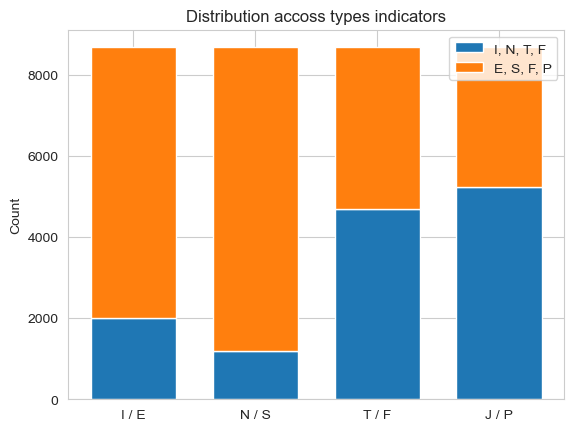

In [52]:
#Plot the distribution of each group (axis)
N = 4
bottom = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])

ind = np.arange(N)    # the 4 locations for the groups
width = 0.7           # the width of the bars

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()

In [67]:
#Correlations within the variables
data[['IE','NS','TF','JP']].corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


<AxesSubplot:title={'center':'Features Correlation Heatmap'}>

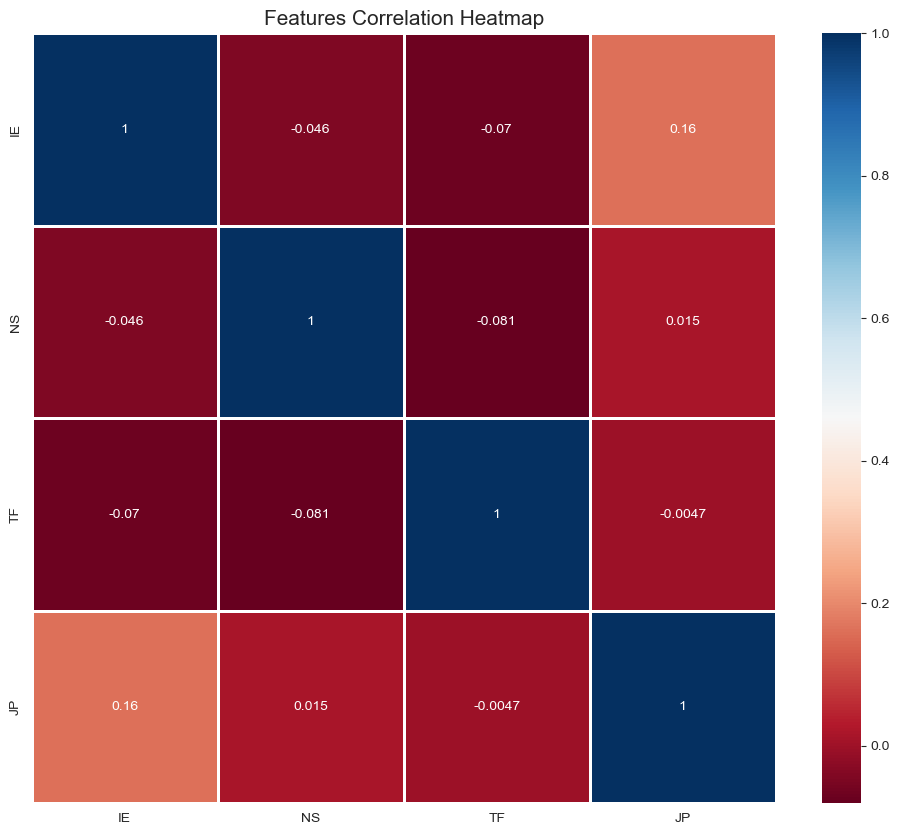

In [68]:
#Plot them into a graphic with colors
cmap = plt.cm.RdBu
corr = data[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Features Correlation Heatmap', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

> IE positively correlated with JP.
> JB and NS positively correlated .

In [69]:
#We use Label Encoding (as before) for transforming these personalities into numeric type.
from sklearn.preprocessing import LabelEncoder
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP','ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

In [70]:
#We Split the MBTI personalities who have 4 letters and we will binarizing them

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):     # Transform 'mbti' type of personalities into binary vectors
    return [b_Pers[l] for l in personality]

#To show results
def translate_back(personality):   # Transform binary vector into mbti personality 
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


In [71]:
def pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_data = len(data)
  i=0
  
  for row in data.iterrows():

      #Remove and clean comments
      posts = row[1].posts

      #Remove url links 
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      #Remove Non-words: keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)
          
      #Remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp
      list_posts.append(temp)

  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

list_posts, list_personality  = pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", data.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", data.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])

Example :

Post before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/up

In [96]:
nRow, nCol = list_personality.shape
print(f'Number of posts = {nRow}  and Number of Personalities = {nCol} ')

Number of posts = 8675  and Number of Personalities = 4 


In [107]:
nRow, nCol = list_personality.shape
print(f'Number of posts = {nRow}  and Number of Personalities = {nCol} ')


# Vectorizing the posts to a matrix for the model
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000,  
                             max_df=0.8,
                             min_df=0.2) 
# Variables should be made of word n-gram 
# Learn the vocabularies' dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The calculated object yields pairs which contain a 'count' and a 'value' 
# In this way, it will be useful for obtaining an indexed list
feature_names = list(enumerate(cntizer.get_feature_names()))
print("4 feature names can be seen below")
print(feature_names[0:4])

# We will transform the count matrix into a normalized tf-idf form
tfizer = TfidfTransformer()
# Learn the tf-idf vector and transform a count matrix to a tf-idf form
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

Number of posts = 8675  and Number of Personalities = 4 
Using CountVectorizer :
4 feature names can be seen below
[(0, 'able'), (1, 'actually'), (2, 'after'), (3, 'again')]

Using Tf-idf :
Now the dataset size is as below
(8675, 328)


>Here we have 8675 posts and 328 different weighted words in a post.

In [105]:
#Personality list
personality_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)", 
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])



IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


In [106]:
print("X: 1st posts in tf-idf representation\n%s" % X_tfidf[0])


X: 1st posts in tf-idf representation
[0.         0.         0.         0.07731671 0.08252552 0.
 0.         0.         0.         0.         0.         0.
 0.05275307 0.04925274 0.         0.         0.05304204 0.
 0.         0.         0.06215274 0.         0.         0.
 0.         0.         0.13565351 0.         0.04914993 0.06548211
 0.04810282 0.         0.         0.06431822 0.         0.08277669
 0.         0.         0.14400994 0.         0.         0.
 0.         0.06828517 0.         0.08639121 0.0893412  0.10728191
 0.         0.06802559 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.16411874 0.         0.         0.         0.         0.15951878
 0.08247863 0.         0.08581955 0.         0.05145234 0.
 0.06883134 0.13825798 0.         0.         0.         0.15710337
 0.         0.         0.         0.         0.         0.
 0.         0.06601532 0.         0.         0.         0.
 0.06571379 0.         0.04415963 0. 

In [108]:
print("For MBTI personality type : %s" % translate_back(list_personality[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality[0,:])

For MBTI personality type : INFJ
Y : Binarized MBTI 1st row: [0 0 0 0]


>Here we can see the original form of the 1st personality type is INFJ, after the binarization, the Y (MBTI personality) is transformed into [0 0 0 0].

In [109]:
# Posts in form of tf-idf 
X = X_tfidf

In [110]:
# Logistic Regression for dataset
# One by one training each mbti personlity group
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into trainning and testing sets
    # here we use 33%, the 1/3 part of the dataset as the test data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = LogisticRegression() 
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))



IE: Introversion (I) / Extroversion (E) Accuracy: 81.56%
NS: Intuition (N) / Sensing (S) Accuracy: 86.13%
FT: Feeling (F) / Thinking (T) Accuracy: 79.18%
JP: Judging (J) / Perceiving (P) Accuracy: 73.70%


In [111]:
# Random Forest model for dataset
# One by one training each mbti personlity group
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into trainning and testing sets
    # here we use 33%, the 1/3 part of the dataset as the test data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))



IE: Introversion (I) / Extroversion (E) Accuracy: 78.10%
NS: Intuition (N) / Sensing (S) Accuracy: 86.03%
FT: Feeling (F) / Thinking (T) Accuracy: 76.63%
JP: Judging (J) / Perceiving (P) Accuracy: 70.56%


In [112]:
# XGBoost model for dataset 
# One by one training each mbti personlity group
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into trainning and testing sets
    # here we use 33%, the 1/3 part of the dataset as the test data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 81.91%
NS: Intuition (N) / Sensing (S) Accuracy: 86.24%
FT: Feeling (F) / Thinking (T) Accuracy: 76.35%
JP: Judging (J) / Perceiving (P) Accuracy: 72.23%


In [113]:
# KNN model for dataset
# One by one training each mbti personlity group
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into trainning and testing sets
    # here we use 33%, the 1/3 part of the dataset as the test data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
   
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 78.69%
NS: Intuition (N) / Sensing (S) Accuracy: 85.43%
FT: Feeling (F) / Thinking (T) Accuracy: 63.05%
JP: Judging (J) / Perceiving (P) Accuracy: 52.78%


In [114]:
# SVM model for dataset
# One by one training each mbti personlity group
for l in range(len(personality_type)):
    
    Y = list_personality[:,l]

    # split data into trainning and testing sets
    # here we use 33%, the 1/3 part of the dataset as the test data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = SVC(random_state = 1)
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 82.43%
NS: Intuition (N) / Sensing (S) Accuracy: 86.03%
FT: Feeling (F) / Thinking (T) Accuracy: 79.36%
JP: Judging (J) / Perceiving (P) Accuracy: 73.24%


# Interpretation
> We estimated 16 personalities with all 4 axis together before, so the accuracy will be a little bit lower and there is only one accuracy, but if we separately estimate the 4 axis, the accuracy will be higher than before because we estimated 4 types of opposite personalities one by one and we had 4 accuracies at the same time in this way.

> So, by grouping the 16 personalities into 4 groups, we notice that all models perform better with higher accuracies than when they are not grouped together.

> And we choose the model with the highest accuracy for each axis. Out of all the models, we can see that in XGBoost model, the group IE has an accuracy of 81.91% which is lower than that in the SVM model: 82.43%, however, the group NS has an accuracy of 86.24% which is higher than that in the SVM model: 86.03%.

> Conclusion: we can't choose a model for all the 4 groups but for each group we choose a regression model with the highest degree of performance.

## Prediction

In [139]:
# We have used a post of Emmanuel Macron in the instagram and we try to predic his MBTI personality.
my_posts  = """We knew that this G20 would be difficult. We had a responsibility: to defend peace and avoid a division of the world. That is the message we sent to President Putin.

The majority of G20 members condemn the war in Ukraine. We all affirm respect for international law.

Faced with the consequences of the war, we are working together, in particular on access to fertilizers and grain exports.

And despite the war, we have continued to make progress on climate and biodiversity. For the first time, the G20 has made a clear commitment to get out of coal.

"""

# The type is just a dummy so that the data prep function can be reused
mydata = pd.DataFrame(data={'type': ['INFJ'], 'posts': [my_posts]})

my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [140]:
#SVM Prediction
result = []
models = []
# One by one training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = SVC(random_state = 1)
    model.fit(X_train, y_train)
    models.append(model)

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [141]:
# Make predictions for my data
for model in models :
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

In [142]:
print("The result is: ", translate_back(result))


The result is:  INFP
